In [16]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt

In [17]:
# this is in my google docs!

vals = pd.read_excel("/Users/will/Downloads/Rache LED dress mapping 2024.xlsx", sheet_name='2024').iloc[2:].values

In [18]:
pixels = []

for col in range(vals.shape[1]):
    for row in range(vals.shape[0]):
        x = col / vals.shape[1]
        y = row / vals.shape[0]
        v = vals[row, col]
        if isinstance(v, int) or (isinstance(v, float) and not np.isnan(v)):
            pixels.append([col, row, int(v)])

pixel_df = pd.DataFrame(pixels, columns=['x', 'y', 'n'])
#pixel_df = pixel_df.head(200)

num_pixels = len(pixel_df)
# adding in an offset to put the join under the arm 
# pixel_df['n'] = pixel_df['n'].apply(lambda n: (n - 127) % num_pixels)

# I think this line just rotates everything around the cylinder by 15 pixels to try and make the patterns join under the arm...
pixel_df['x'] = pixel_df['x'].apply(lambda x: (x-15) % (max(pixel_df['x']) + 1))
pixel_df = pixel_df.sort_values('n')
pixel_df['c'] = 'blue'
pixel_df.loc[pixel_df.n == 0, 'c'] = 'red'

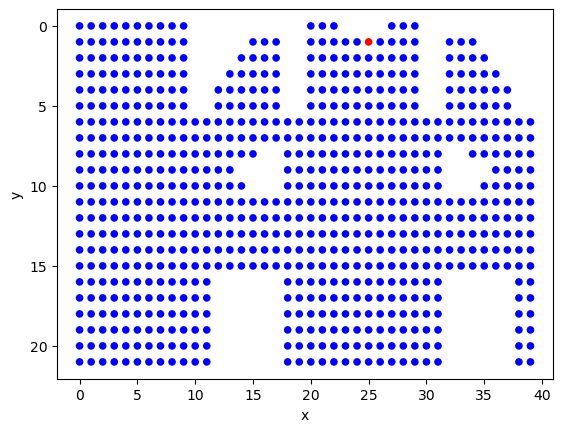

In [19]:
pixel_df.plot.scatter(x='x', y='y', c='c')
plt.gca().invert_yaxis()



In [20]:
pixel_df

,x,y,n,c
0,25,1,0,red
1,25,2,1,blue
2,25,3,2,blue
3,25,4,3,blue
4,25,5,4,blue
...,...,...,...,...
566,17,5,709,blue
565,17,4,710,blue
564,17,3,711,blue
563,17,2,712,blue


In [21]:
print(json.dumps([[int(r['x']), int(r['y'])] for _, r in pixel_df.sort_values('n').iterrows()]))


[[25, 1], [25, 2], [25, 3], [25, 4], [25, 5], [25, 6], [25, 7], [25, 8], [25, 9], [25, 10], [25, 11], [25, 12], [25, 13], [25, 14], [25, 15], [25, 16], [25, 17], [25, 18], [25, 19], [25, 20], [25, 21], [26, 21], [26, 20], [26, 19], [26, 18], [26, 17], [26, 16], [26, 15], [26, 14], [26, 13], [26, 12], [26, 11], [26, 10], [26, 9], [26, 8], [26, 7], [26, 6], [26, 5], [26, 4], [26, 3], [26, 2], [26, 1], [27, 0], [27, 1], [27, 2], [27, 3], [27, 4], [27, 5], [27, 6], [27, 7], [27, 8], [27, 9], [27, 10], [27, 11], [27, 12], [27, 13], [27, 14], [27, 15], [27, 16], [27, 17], [27, 18], [27, 19], [27, 20], [27, 21], [28, 21], [28, 20], [28, 19], [28, 18], [28, 17], [28, 16], [28, 15], [28, 14], [28, 13], [28, 12], [28, 11], [28, 10], [28, 9], [28, 8], [28, 7], [28, 6], [28, 5], [28, 4], [28, 3], [28, 2], [28, 1], [28, 0], [29, 0], [29, 1], [29, 2], [29, 3], [29, 4], [29, 5], [29, 6], [29, 7], [29, 8], [29, 9], [29, 10], [29, 11], [29, 12], [29, 13], [29, 14], [29, 15], [29, 16], [29, 17], [29, 18

In [22]:
pixel_df.shape


(714, 4)